In [ ]:
import string
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from ImageManipulation_module import *

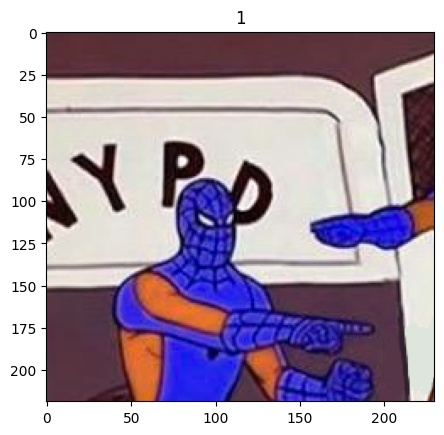

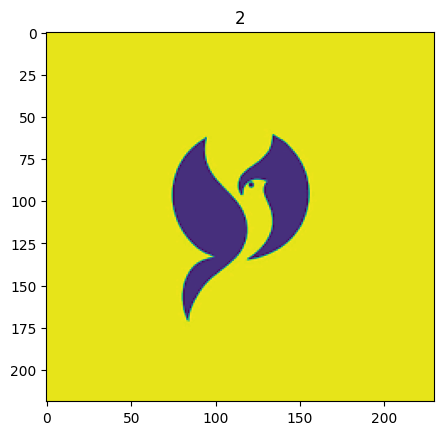

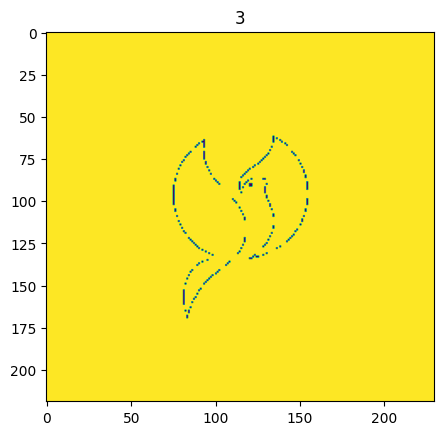

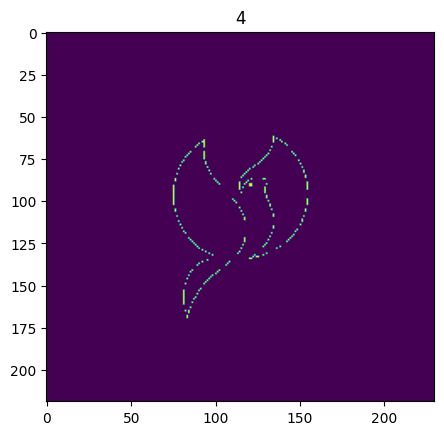

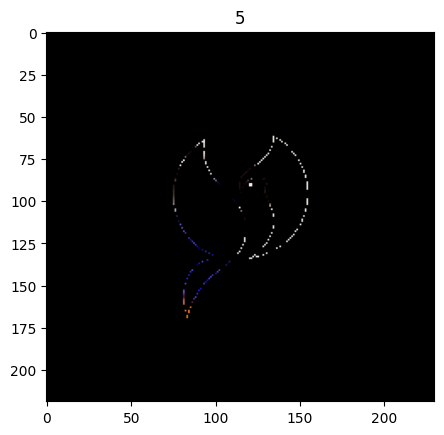

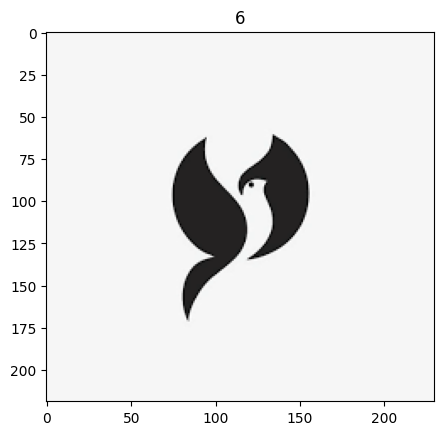

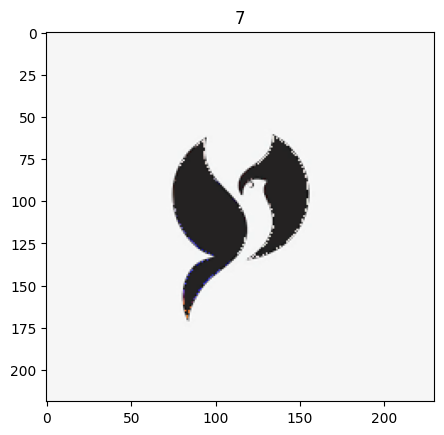

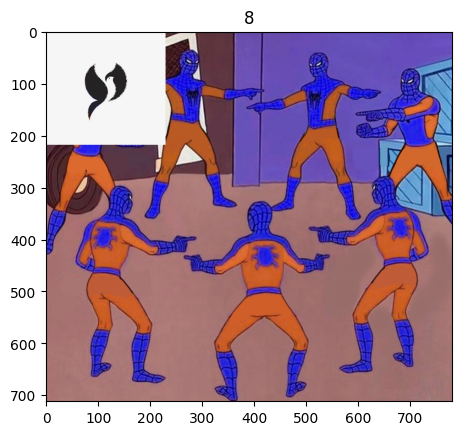

In [18]:
def show(img1, title):
    plt.imshow(img1)
    plt.title(title)
    plt.show()
# Load two images
img1 = cv2.imread('test1.png')
img2 = cv2.imread('download.png', -1)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
show(roi, "1")
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
show(img2gray, "2")
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

show(mask, "3")
show(mask_inv, "4")
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
show(img1_bg, "5")
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
show(img2_fg, "6")
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
show(dst, "7")
img1[0:rows, 0:cols ] = dst
show(img1, "8")



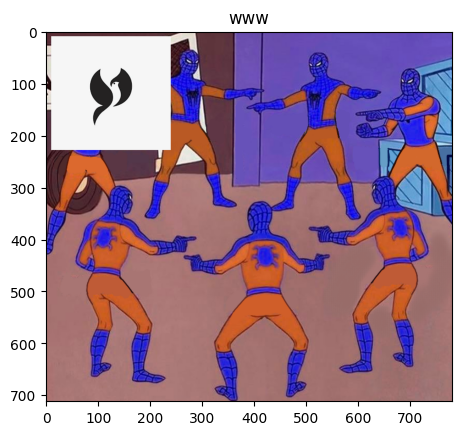

In [4]:
import cv2
def show(img1, title):
    plt.imshow(img1)
    plt.title(title)
    plt.show()
# Load the main image and logo image
main_image = cv2.imread('test1.png')
logo_image = cv2.imread('download.png', -1)  # -1 flag loads image with alpha channel if present

# Determine the dimensions of the logo and the region of interest (ROI) on the main image
logo_height, logo_width, _ = logo_image.shape

# Define the coordinates for placing the logo (top-left corner)
x_offset = 10  # adjust as necessary
y_offset = 10  # adjust as necessary

# Check if the logo image has an alpha channel
if logo_image.shape[2] == 4:
    # Blend the logo with the main image using alpha blending
    for c in range(0, 3):  # iterate over RGB channels
        main_image[y_offset:y_offset + logo_height, x_offset:x_offset + logo_width, c] = \
            logo_image[:, :, c] * (logo_image[:, :, 3] / 255.0) + \
            main_image[y_offset:y_offset + logo_height, x_offset:x_offset + logo_width, c] * \
            (1.0 - logo_image[:, :, 3] / 255.0)
else:
    # If no alpha channel, perform simple overlay
    main_image[y_offset:y_offset + logo_height, x_offset:x_offset + logo_width] = logo_image[:, :]

# Display the resulting image
# Display the resulting image
show(main_image, "www")



In digital image processing, an image is represented as a grid of pixels, where each pixel corresponds to a single point in the image. The image can be considered as a 2-dimensional array or matrix of pixel values. The pixel values represent the intensity or color of each point in the image.
Matrix Dimensions: The dimensions of the matrix correspond to the dimensions of the image. For example, a grayscale image with dimensions 200x300 pixels will be represented as a matrix with dimensions 200x300.
Matrix Operations: Image processing operations often involve manipulating the matrix of pixel values directly. Operations such as filtering, transformation, and enhancement are performed by applying mathematical operations to the pixel values in the image m